<a href="https://colab.research.google.com/github/kridtapon/Bitcoin-correlation-with-Google-Trend/blob/main/Bitcoin_correlation_with_Google_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("multiTimeline.csv")

df_from_2009 = df.loc['2009-01':]

In [76]:
df_from_2009 = df_from_2009.reset_index()

In [77]:
df_from_2009

,index,Category: All categories
0,2009-01,0
1,2009-02,0
2,2009-03,0
3,2009-04,0
4,2009-05,0
...,...,...
187,2024-08,23
188,2024-09,18
189,2024-10,18
190,2024-11,44


In [78]:
df_from_2009.columns = ['Date','bitcoin: (Worldwide)']

In [79]:
df_from_2009

,Date,bitcoin: (Worldwide)
0,2009-01,0
1,2009-02,0
2,2009-03,0
3,2009-04,0
4,2009-05,0
...,...,...
187,2024-08,23
188,2024-09,18
189,2024-10,18
190,2024-11,44


In [80]:
df_from_2009 = df_from_2009.reset_index(drop=True)

In [81]:
df_from_2009

,Date,bitcoin: (Worldwide)
0,2009-01,0
1,2009-02,0
2,2009-03,0
3,2009-04,0
4,2009-05,0
...,...,...
187,2024-08,23
188,2024-09,18
189,2024-10,18
190,2024-11,44


In [82]:
import yfinance as yf

In [83]:
# Define the stock symbol and time period
symbol = 'BTC-USD'
start_date = '2014-10-01'
end_date = '2024-12-20'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [84]:
# Resample the data by month, for example, taking the last observation of each month
monthly_df = df.resample('ME').last()

# Format the index to 'YYYY-MM'
monthly_df.index = monthly_df.index.strftime('%Y-%m')

In [85]:
BTC_PCT = (monthly_df['Close'].pct_change()+1).cumprod()
BTC_PCT

,Close
Date,
2014-10,NaN
2014-11,1.117421
2014-12,0.946418
2015-01,0.642774
2015-02,0.751544
...,...
2024-08,174.301613
2024-09,187.187604
2024-10,207.540131


In [86]:
BTC_PCT = BTC_PCT.to_frame()  # Convert Series to DataFrame

In [87]:
BTC_PCT = BTC_PCT.reset_index()

In [88]:
BTC_PCT

,Date,Close
0,2014-10,NaN
1,2014-11,1.117421
2,2014-12,0.946418
3,2015-01,0.642774
4,2015-02,0.751544
...,...,...
118,2024-08,174.301613
119,2024-09,187.187604
120,2024-10,207.540131
121,2024-11,285.081478


In [99]:
# Merge DataFrames on 'ID' column
merged_df = pd.merge(df_from_2009 , BTC_PCT, on='Date', how='inner')

In [100]:
merged_df

,Date,bitcoin: (Worldwide),Close
0,2014-10,3,NaN
1,2014-11,3,1.117421
2,2014-12,3,0.946418
3,2015-01,3,0.642774
4,2015-02,3,0.751544
...,...,...,...
118,2024-08,23,174.301613
119,2024-09,18,187.187604
120,2024-10,18,207.540131
121,2024-11,44,285.081478


In [101]:
import pandas as pd

# Assuming your DataFrame is named df
merged_df.set_index('Date', inplace=True)  # Set the 'Date' column as the index

In [117]:
merged_df

,bitcoin: (Worldwide),Close
Date,,
2014-10,3,NaN
2014-11,3,1.117421
2014-12,3,0.946418
2015-01,3,0.642774
2015-02,3,0.751544
...,...,...
2024-08,23,174.301613
2024-09,18,187.187604
2024-10,18,207.540131


In [181]:
merged_df.columns = ['Trend','Return Bitcoin']

In [182]:
merged_df

,Trend,Return Bitcoin
Date,,
2015-01,3,0.642774
2015-02,3,0.751544
2015-03,3,0.721871
2015-04,2,0.697991
2015-05,2,0.680389
...,...,...
2024-08,23,174.301613
2024-09,18,187.187604
2024-10,18,207.540131


In [172]:
merged_df = merged_df.iloc[2:]

In [183]:
merged_df

,Trend,Return Bitcoin
Date,,
2015-01,3,0.642774
2015-02,3,0.751544
2015-03,3,0.721871
2015-04,2,0.697991
2015-05,2,0.680389
...,...,...
2024-08,23,174.301613
2024-09,18,187.187604
2024-10,18,207.540131


In [184]:
print(merged_df.dtypes)

Trend               int64
Return Bitcoin    float64
dtype: object


In [186]:
merged_df['Trend'] = pd.to_numeric(merged_df['Trend'], errors='coerce')

<ipython-input-186-737b50695be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Trend'] = pd.to_numeric(merged_df['Trend'], errors='coerce')


In [176]:
import matplotlib.pyplot as plt

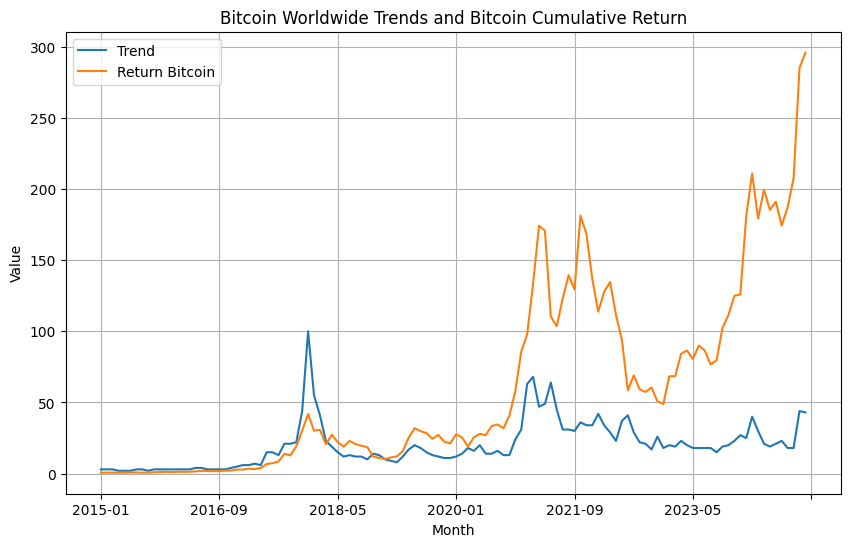

In [187]:
# Plot the data
merged_df.plot(figsize=(10, 6), title='Bitcoin Worldwide Trends and Bitcoin Cumulative Return', legend=True)

# Customize the axes and labels
plt.xlabel('Month')
plt.ylabel('Value')

# Add a grid for better readability
plt.grid(True)

# Display the plot
plt.show()


In [188]:
merged_df.corr()

,Trend,Return Bitcoin
Trend,1.000000,0.564779
Return Bitcoin,0.564779,1.000000


In [179]:
import seaborn as sns

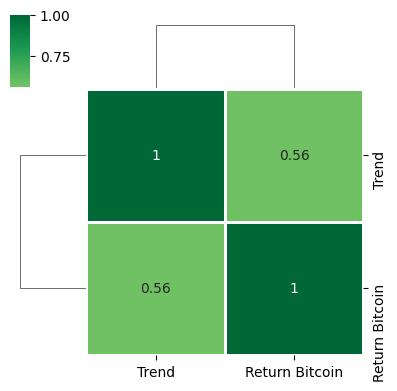

In [189]:
g = sns.clustermap(merged_df.corr(), method='ward', center = 0.0, cmap="RdYlGn",
                   dendrogram_ratio=(.2, .2),
                   linewidths=.75, figsize=(4, 4),
                   annot = True)

<Axes: xlabel='Date'>

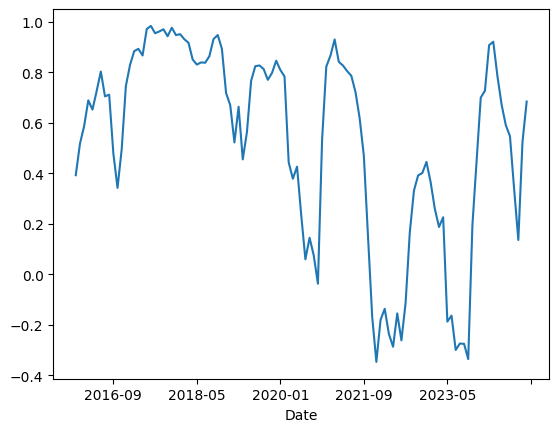

In [190]:
merged_df['Trend'].rolling(12).corr(merged_df['Return Bitcoin']).plot()